# 0 loading the audio files & samples visualization 

In [21]:
import os  # Importing the 'os' module to interact with the file system

# Path to your dataset folder
dataset_path = "./free-spoken-digit-dataset-master/recordings/"  # Specify the folder where your dataset is located

# List all files in the specified directory
data_list = os.listdir(dataset_path)  # Retrieves all files and directories in the dataset folder

# Loop to print all the files in the directory
for i in range(len(data_list)):  # Loop through all files in the directory
    print(data_list[i])  # Print each file's name in the dataset list


0_george_0.wav
0_george_1.wav
0_george_10.wav
0_george_11.wav
0_george_12.wav
0_george_13.wav
0_george_14.wav
0_george_15.wav
0_george_16.wav
0_george_17.wav
0_george_18.wav
0_george_19.wav
0_george_2.wav
0_george_20.wav
0_george_21.wav
0_george_22.wav
0_george_23.wav
0_george_24.wav
0_george_25.wav
0_george_26.wav
0_george_27.wav
0_george_28.wav
0_george_29.wav
0_george_3.wav
0_george_30.wav
0_george_31.wav
0_george_32.wav
0_george_33.wav
0_george_34.wav
0_george_35.wav
0_george_36.wav
0_george_37.wav
0_george_38.wav
0_george_39.wav
0_george_4.wav
0_george_40.wav
0_george_41.wav
0_george_42.wav
0_george_43.wav
0_george_44.wav
0_george_45.wav
0_george_46.wav
0_george_47.wav
0_george_48.wav
0_george_49.wav
0_george_5.wav
0_george_6.wav
0_george_7.wav
0_george_8.wav
0_george_9.wav
0_jackson_0.wav
0_jackson_1.wav
0_jackson_10.wav
0_jackson_11.wav
0_jackson_12.wav
0_jackson_13.wav
0_jackson_14.wav
0_jackson_15.wav
0_jackson_16.wav
0_jackson_17.wav
0_jackson_18.wav
0_jackson_19.wav
0_jackso

# 1  Time-domain analysis implementation & Initial feature extraction

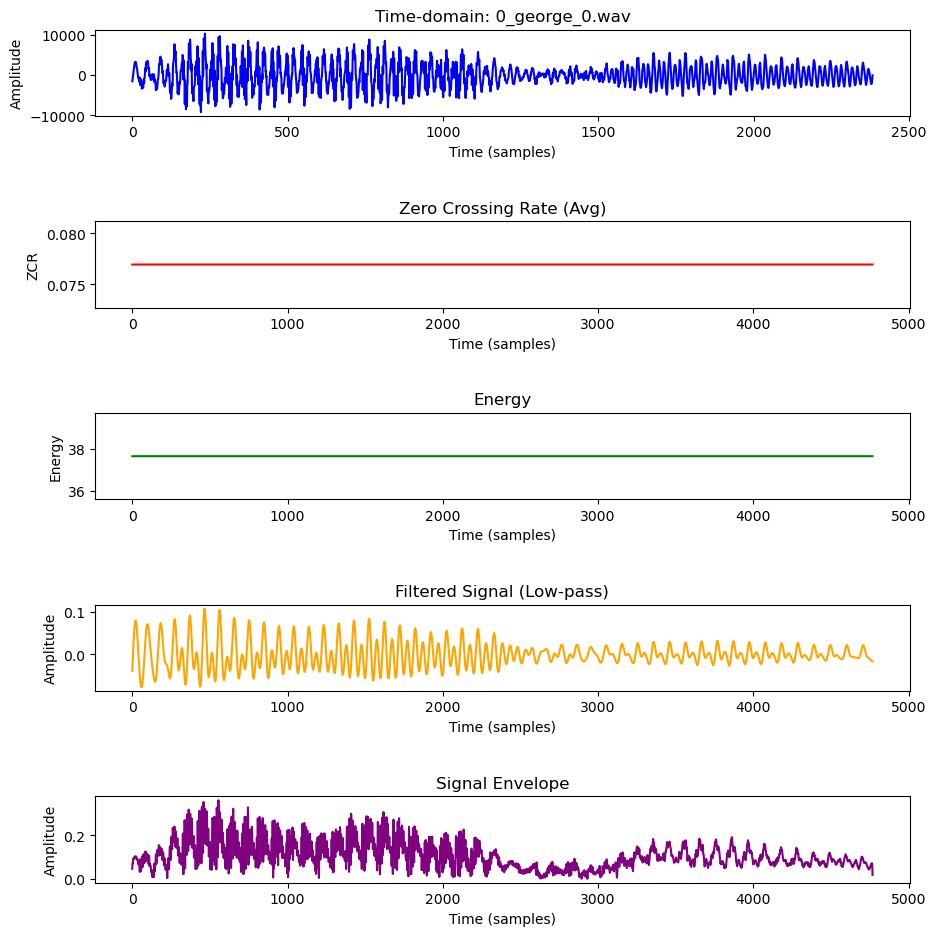

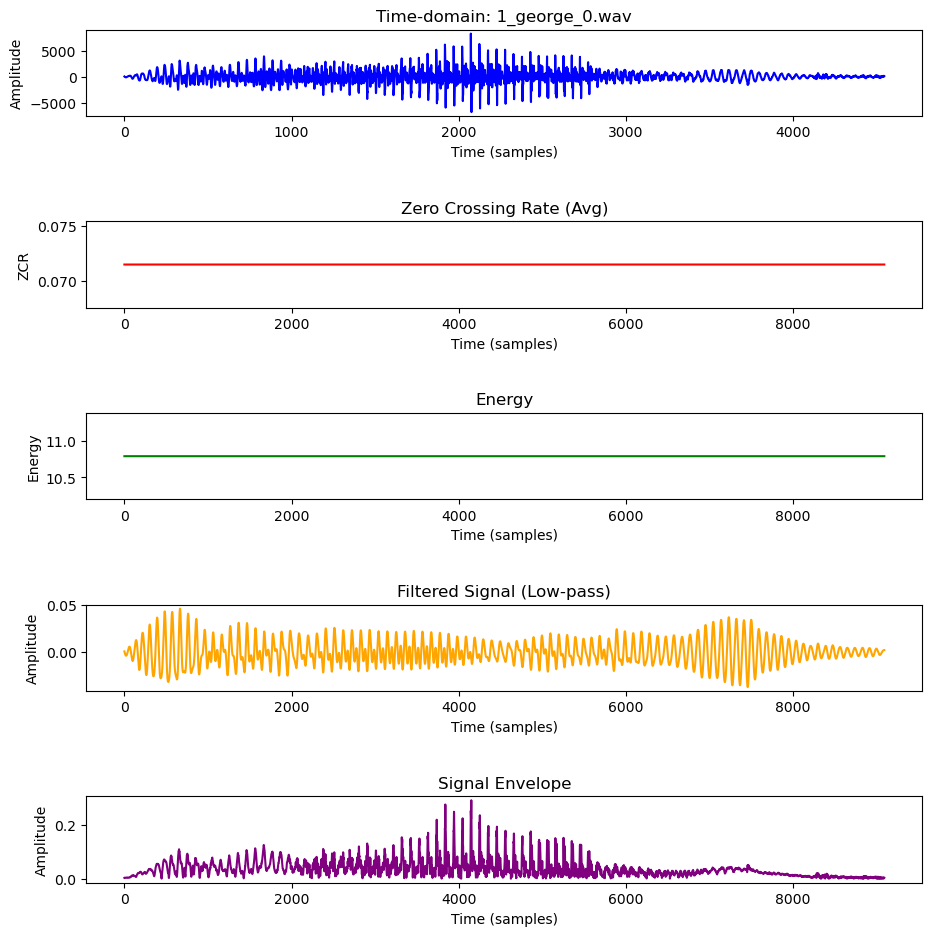

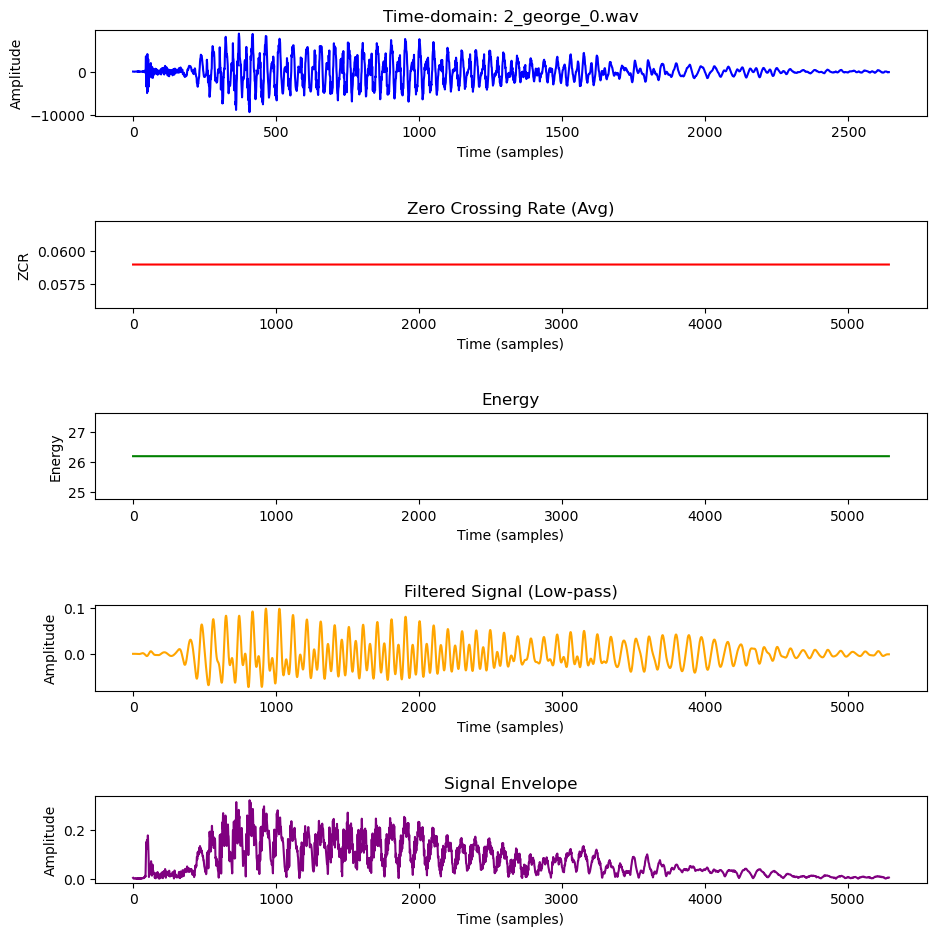

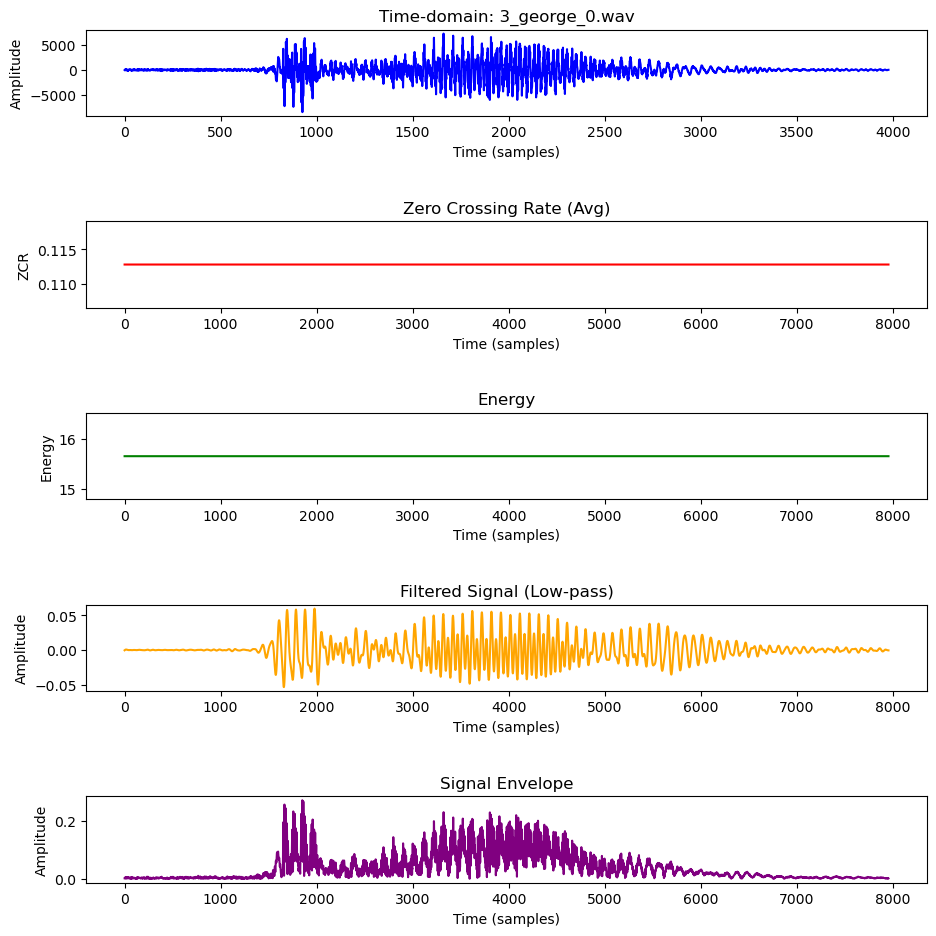

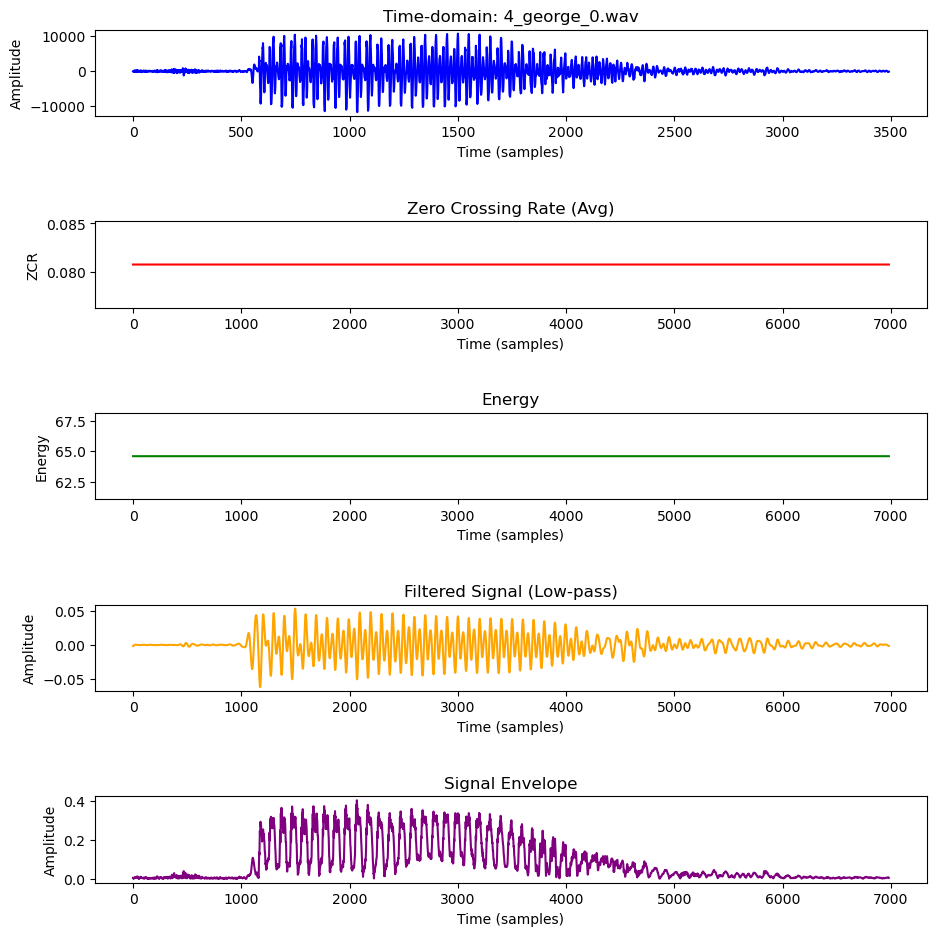

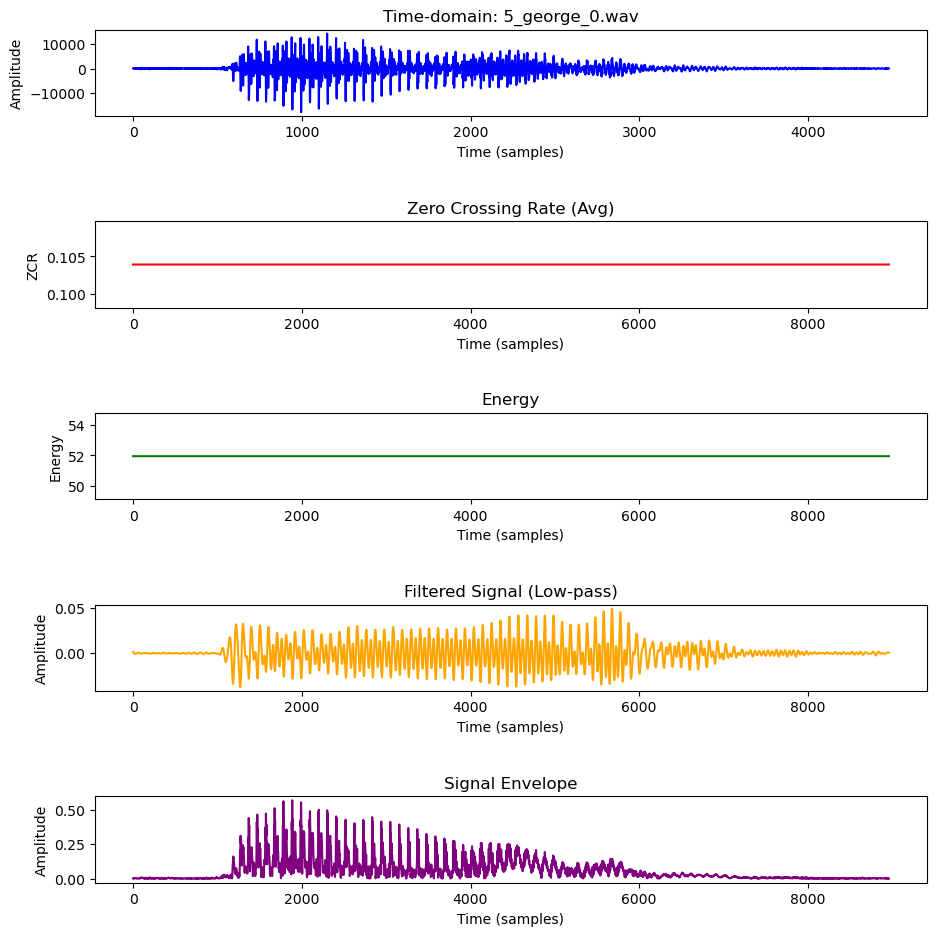

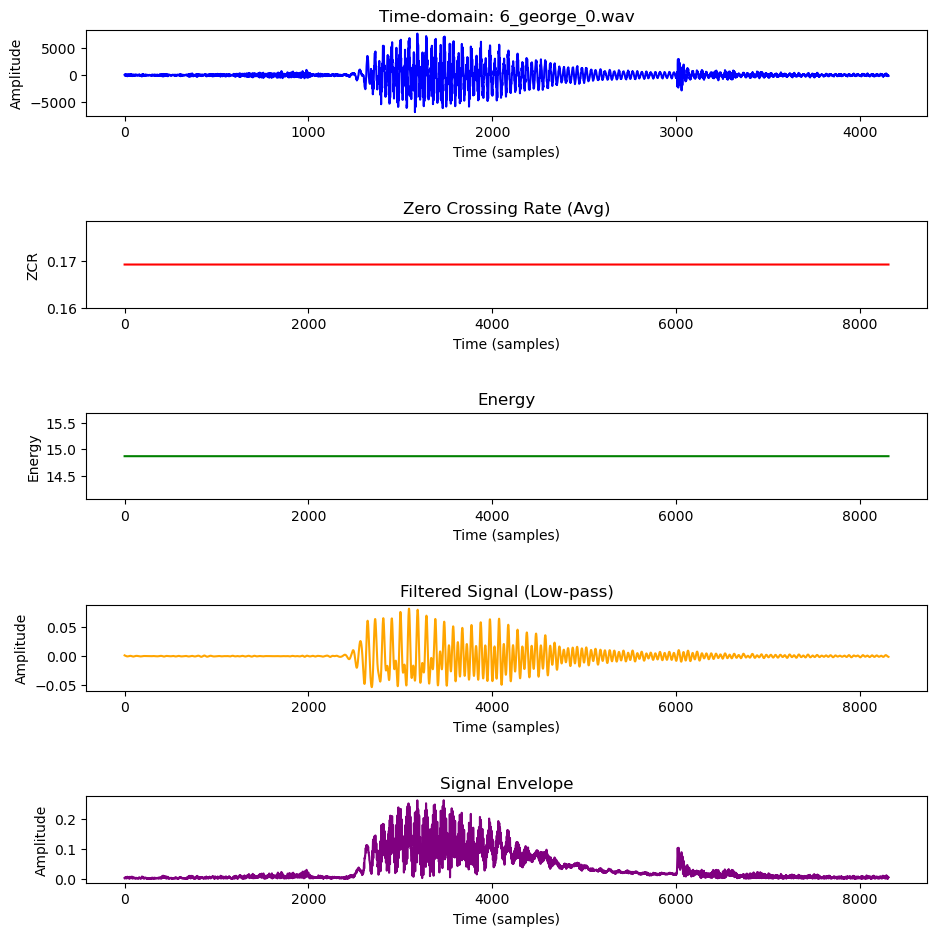

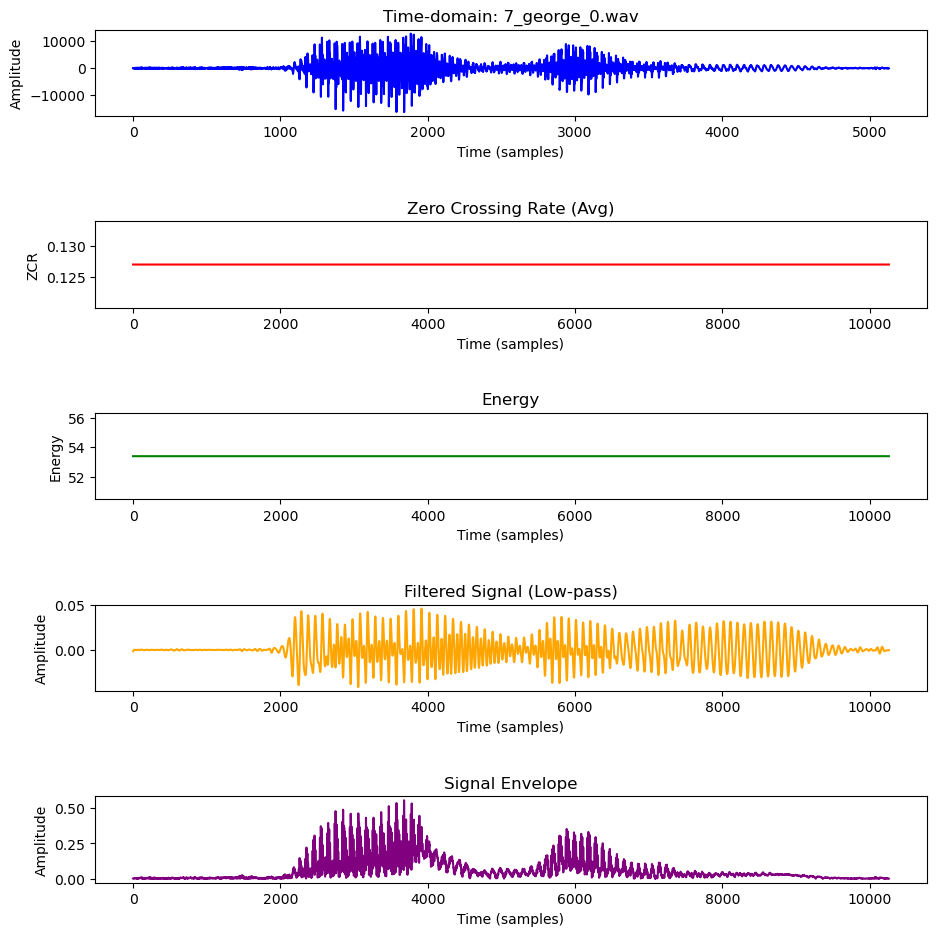

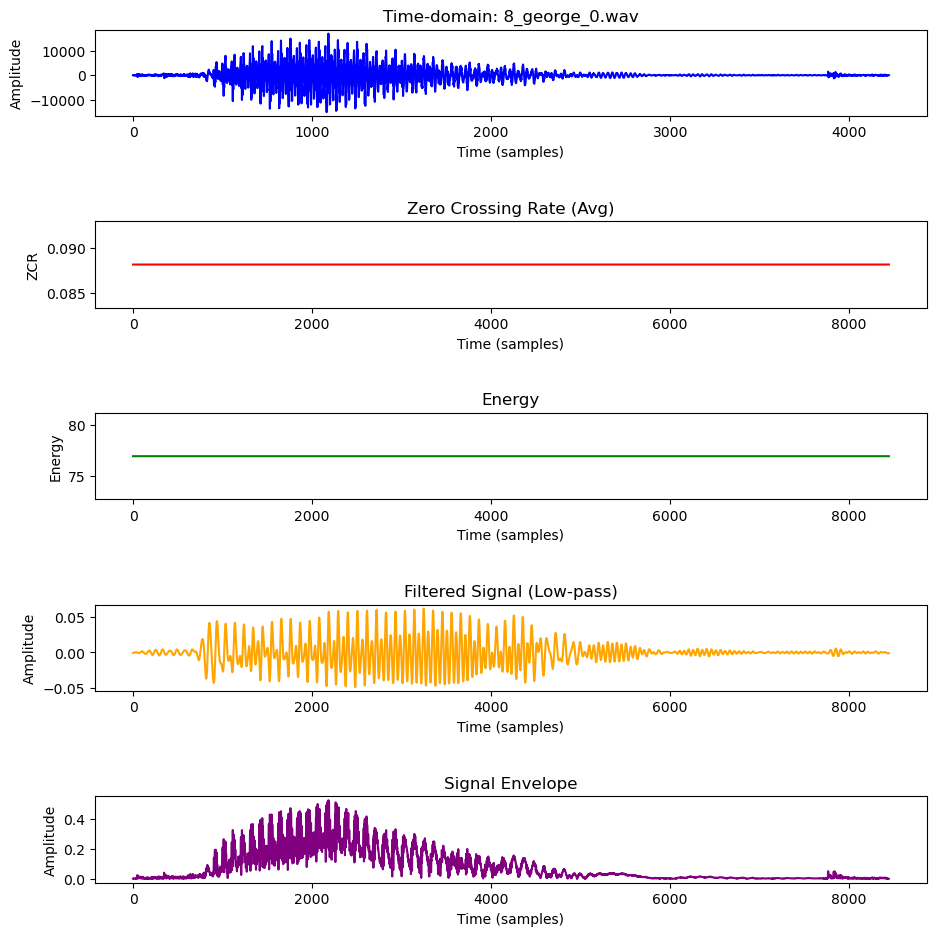

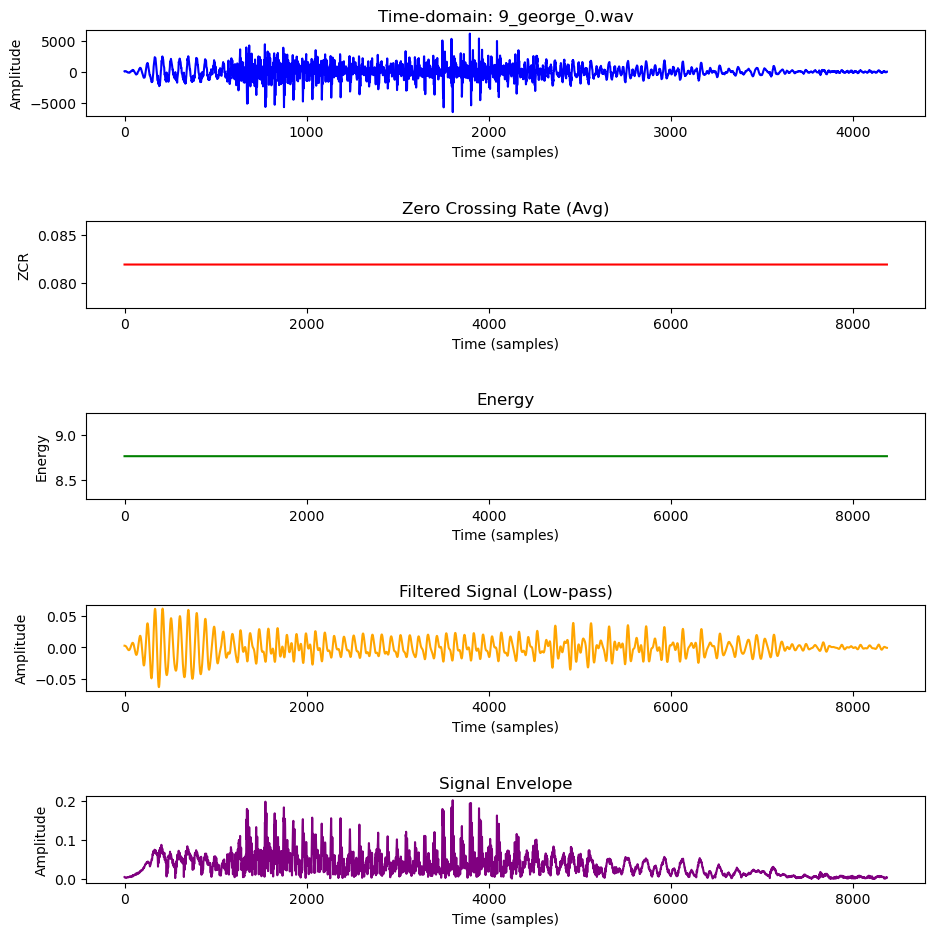

In [25]:
import os
import wave
import numpy as np
import librosa
import scipy.signal as signal
import matplotlib.pyplot as plt

time_domain_features = []
labels = []
plotted_digits = set()

for filename in data_list:
    digit = int(filename.split('_')[0])
    
    if digit in plotted_digits:
        continue
    
    plotted_digits.add(digit)

    file_path = os.path.join(dataset_path, filename)
    signal_wave = wave.open(file_path, 'r')
    sample_rate = 16000
    sig = np.frombuffer(signal_wave.readframes(sample_rate), dtype=np.int16)
    audio, sr = librosa.load(file_path, sr=sample_rate)

    zcr = np.mean(librosa.feature.zero_crossing_rate(audio))
    energy = np.sum(np.square(audio))

    time_domain_features.append([zcr, energy])
    labels.append(digit)

    nyquist = 0.5 * sr
    low_cutoff = 300
    b, a = signal.butter(4, low_cutoff / nyquist, btype='low')
    filtered_signal = signal.filtfilt(b, a, audio)
    envelope = np.abs(signal.hilbert(audio))

    # === Plotting ===
    plt.figure(figsize=(10, 10))

    plot_a = plt.subplot(511)
    plot_a.set_title(f'Time-domain: {filename}')
    plot_a.plot(sig, color='blue')
    plot_a.set_xlabel('Time (samples)')
    plot_a.set_ylabel('Amplitude')

    plot_b = plt.subplot(512)
    plot_b.plot(np.ones_like(audio) * zcr, color='red')
    plot_b.set_title('Zero Crossing Rate (Avg)')
    plot_b.set_xlabel('Time (samples)')
    plot_b.set_ylabel('ZCR')

    plot_c = plt.subplot(513)
    plot_c.plot(np.ones_like(audio) * energy, color='green')
    plot_c.set_title('Energy')
    plot_c.set_xlabel('Time (samples)')
    plot_c.set_ylabel('Energy')

    plot_d = plt.subplot(514)
    plot_d.plot(filtered_signal, color='orange')
    plot_d.set_title('Filtered Signal (Low-pass)')
    plot_d.set_xlabel('Time (samples)')
    plot_d.set_ylabel('Amplitude')

    plot_e = plt.subplot(515)
    plot_e.plot(envelope, color='purple')
    plot_e.set_title('Signal Envelope')
    plot_e.set_xlabel('Time (samples)')
    plot_e.set_ylabel('Amplitude')

    plt.tight_layout(pad=3.0)
    plt.show()

    if len(plotted_digits) == 10:
        break


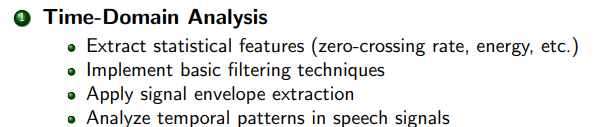

## Covered for Time-Domain Analysis:

### Extract statistical features (ZCR, Energy): Done.

### Implement basic filtering techniques: Done with a low-pass filter.

### Apply signal envelope extraction: Done using the Hilbert transform.

### Analyze temporal patterns: The visualizations of the signal and its features help with analyzing temporal patterns.

In [ ]:
2 Frequency-domain analysis implementation & Initial feature extraction

In [15]:
def extract_frequency_features(file_path, sample_rate=16000):
    # Load and normalize audio
    audio, sr = librosa.load(file_path, sr=sample_rate)
    audio = audio / np.max(np.abs(audio))

    # Windowing
    audio_windowed = audio * np.hamming(len(audio))

    # STFT
    stft_result = librosa.stft(audio_windowed, n_fft=1024, hop_length=512)
    stft_magnitude = np.abs(stft_result)
    stft_mean = np.mean(stft_magnitude)
    stft_std = np.std(stft_magnitude)

    # MFCCs
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

    # Spectrogram
    spectrogram = librosa.amplitude_to_db(stft_magnitude, ref=np.max)

    # Spectral features
    centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)[0]
    bandwidth = librosa.feature.spectral_bandwidth(y=audio, sr=sr)[0]
    rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr)[0]
    flatness = librosa.feature.spectral_flatness(y=audio)[0]

    # Formant extraction using LPC
    def extract_formants(signal, sr, lpc_order=12):
        A = librosa.lpc(signal, lpc_order)
        roots = np.roots(A)
        roots = [r for r in roots if np.imag(r) >= 0.01]
        angz = np.arctan2(np.imag(roots), np.real(roots))
        formants = sorted(angz * (sr / (2 * np.pi)))
        return formants[:3] if len(formants) >= 3 else [0, 0, 0]

    formants = extract_formants(audio, sr)

    # Combine features
    features = np.hstack([
        np.mean(mfccs, axis=1), np.std(mfccs, axis=1),
        np.mean(spectrogram), np.std(spectrogram),
        np.mean(centroid), np.std(centroid),
        np.mean(rolloff), np.std(rolloff),
        np.mean(bandwidth), np.std(bandwidth),
        np.mean(flatness), np.std(flatness),
        stft_mean, stft_std,
        formants
    ])

    return features

In [ ]:
Model Traning Function ( MLP function )

In [19]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import scipy as signal

#1 Define dataset path
dataset_path = "./free-spoken-digit-dataset-master/recordings/"
data_list = os.listdir(dataset_path)[:100]  # Load first 100 audio files

#2 Feature extraction function
# def extract_features(file_path, sample_rate=16000):
#     # Load and normalize audio
#     audio, sr = librosa.load(file_path, sr=sample_rate)
#     audio = audio / np.max(np.abs(audio))

#     #3 Windowing and zero-padding
#     window = np.hamming(len(audio))
#     audio_windowed = audio * window
#     n_fft = 2048
#     fft_spectrum = np.fft.fft(audio_windowed, n=n_fft)
#     freqs = np.fft.fftfreq(n_fft, 1/sr)
#     magnitude = np.abs(fft_spectrum[:n_fft//2])

#     #4 Time-domain features
#     zcr = librosa.feature.zero_crossing_rate(audio)[0]
#     frame_length = 1024
#     hop_length = 512
#     energy = np.array([
#         np.sum(np.square(audio[i:i + frame_length]))
#         for i in range(0, len(audio), hop_length)
#     ])
#     envelope = np.abs(signal.hilbert(audio))

#     #5 Frequency-domain features
#     stft_magnitude = np.abs(librosa.stft(audio))
#     mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
#     spectrogram = librosa.amplitude_to_db(stft_magnitude, ref=np.max)

#     #6 Spectral features
#     centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)[0]
#     bandwidth = librosa.feature.spectral_bandwidth(y=audio, sr=sr)[0]
#     rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr)[0]
#     flatness = librosa.feature.spectral_flatness(y=audio)[0]

#     #7 Formant extraction using LPC
#     def extract_formants(signal, sr, lpc_order=12):
#         A = librosa.lpc(signal, lpc_order)
#         roots = np.roots(A)
#         roots = [r for r in roots if np.imag(r) >= 0.01]
#         angz = np.arctan2(np.imag(roots), np.real(roots))
#         formants = sorted(angz * (sr / (2 * np.pi)))
#         return formants[:3] if len(formants) >= 3 else [0, 0, 0]

#     formants = extract_formants(audio, sr)

#     #8 Aggregate features
#     features = np.hstack([
#         np.mean(zcr), np.std(zcr),
#         np.mean(energy), np.std(energy),
#         np.mean(envelope), np.std(envelope),
#         np.mean(mfccs, axis=1), np.std(mfccs, axis=1),
#         np.mean(spectrogram), np.std(spectrogram),
#         np.mean(centroid), np.std(centroid),
#         np.mean(rolloff), np.std(rolloff),
#         np.mean(bandwidth), np.std(bandwidth),
#         np.mean(flatness), np.std(flatness),
#         np.mean(magnitude), np.std(magnitude),
#         formants
#     ])

#     return features

#9 Extract features for all files
X = []
y = []

for file in data_list:
    file_path = os.path.join(dataset_path, file)
    features = extract_frequency_features(file_path)
    X.append(features)
    label = int(file.split('_')[0])  # Assumes label is before first underscore
    y.append(label)

X = np.array(X)
y = np.array(y)

#10 Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

#11 Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#12 Define MLP model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')  # for digit classification (0–9)
])

#13 Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#14 Train model
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

#15 Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

TypeError: lpc() takes 1 positional argument but 2 were given